In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

## Упражнение 10.1
1. С помощью библиотеки OpenCV считайте изображение:

In [4]:
IMG_PATH = "data\\Task_3\\1.jpg"
image = cv2.imread(IMG_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

2. Постройте гистограмму черно-белого изображения.

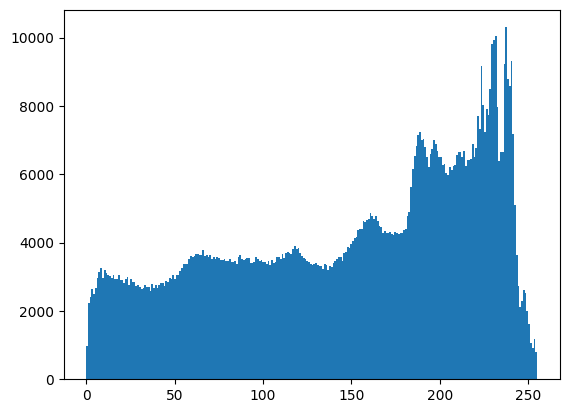

In [19]:
hist = plt.hist(image.ravel(), bins = 256)

Введите максимальное значение функции h(n)
: 

In [7]:
int(hist[0].max())

10300

Введите интенсивность n
, при которой достигается максимум h(n)
:

In [14]:
int(np.ceil(hist[1][np.array(hist[0]).argmax()]))

238

## Упражнение 10.2
1. С помощью библиотеки OpenCV считайте изображение:

In [17]:
IMG_PATH_2 = "data\\Task_3\\2.jpg"
image_2 = cv2.imread(IMG_PATH_2)

2. Постройте гистограмму изображения в палитре RGB. Сравните оценку плотностей распределения интенсивностей по каналам R, G и B.

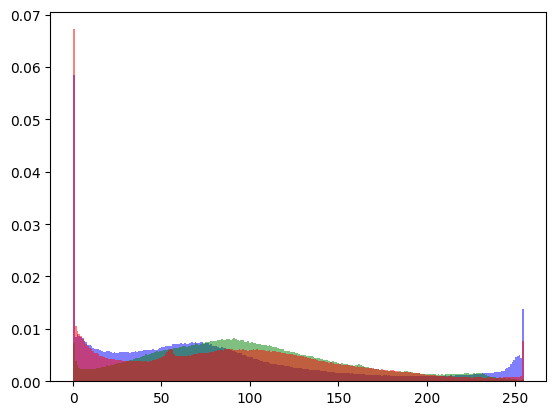

In [73]:
hist = []
colors = ['blue', 'green', 'red']
max_p = 0
for i in [0, 1, 2]:
    hist.append(plt.hist(np.array(image_2[:, :, i].ravel()), bins=256, color=colors[i], alpha = 0.5, density=True))
    max_p = max(max_p, hist[i][0].max())

Введите наибольшее значение плотности среди трех каналов (результат введите с точностью до 4 знаков после запятой):

In [72]:
print("%.4f" % max_p)

0.0672


## Упражнение 10.3
1. С помощью библиотеки OpenCV считайте изображение:

In [110]:
IMG_PATH_3 = "data\\Task_3\\3.jpg"
image_3 = cv2.imread(IMG_PATH_3)

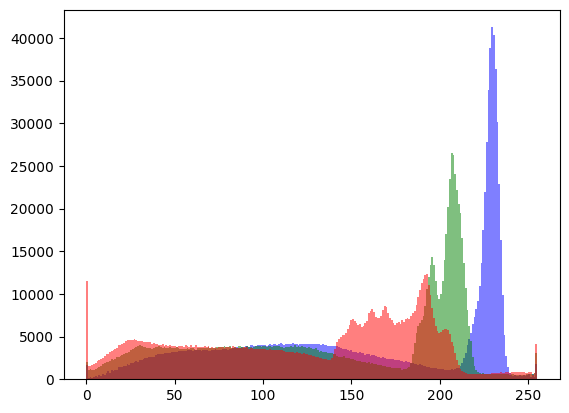

In [111]:
hist = []
colors = ['blue', 'green', 'red']
max_p = 0
for i in [0, 1, 2]:
    hist.append(plt.hist(np.array(image_3[:, :, i].ravel()), bins=256, color=colors[i], alpha = 0.5))

2. Выполните линейную нормировку и растяжение на диапазон 0−255
 гистограммы по каналам R, G и B.

In [120]:
new_image_3 = image_3.copy()
for i in [0, 1, 2]:
    new_image_3[:, :, i] = (image_3[:, :, i] - image_3[:, :, i].min()) / (image_3[:, :, i].max() - image_3[:, :, i].min()) * 255

3. Определите интенсивность каналов R, G, B для пикселя, находящегося на пересечении `422`
 строки и `611`
 столбца матричного представления изображения.

In [119]:
b, g, r = new_image_3[422][611]
print("R: ", r)
print("G: ", g)
print("B: ", b)

R:  44
G:  61
B:  81


## Упражнение 10.4
1. С помощью библиотеки OpenCV считайте изображение:

In [154]:
IMG_PATH_4 = "data\\Task_3\\4.jpg"
image_4 = cv2.imread(IMG_PATH_4, cv2.COLOR_BGR2RGB)

2. Преобразуйте изображение в палитру RGB и примените гауссово ядро, используя метод `cv2.GaussianBlur()`, размер ядра `(7,11)`

In [159]:
kernel = (7, 11)
new_image = cv2.GaussianBlur(image_4, kernel, 0)

3. Получите изображение с деталями. Сравните полученный результат с изображениями ниже.

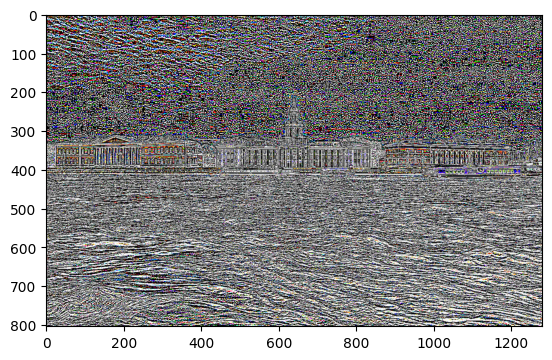

In [160]:
plt.imshow(image_4 - new_image)

## Упражнение 10.5
1. С помощью библиотеки OpenCV считайте черно-белое изображения с шумом типа "соль и перец":

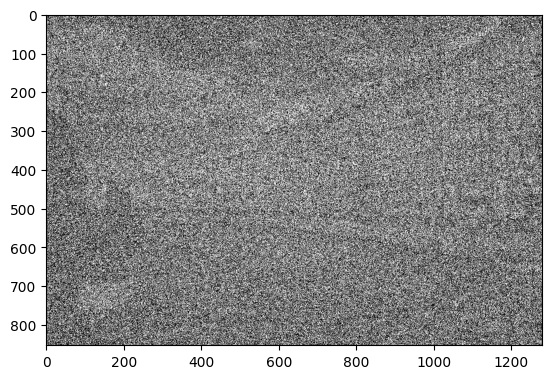

In [165]:
IMG_PATH_5 = "data\\Task_3\\5.jpg"
image_5 = cv2.imread(IMG_PATH_5, cv2.IMREAD_GRAYSCALE)
plt.imshow(image_5, cmap='gray')

2. Примените медианный фильтр `cv2.medianBlur(source, ksize)`. Меняя значение аргумента `ksize`, восстановите двузначное число, указанное в левом верхнем углу изображения. Также Вам может потребоваться изменить гистограмму, подобрать ядро или воспользоваться изображением с деталями.

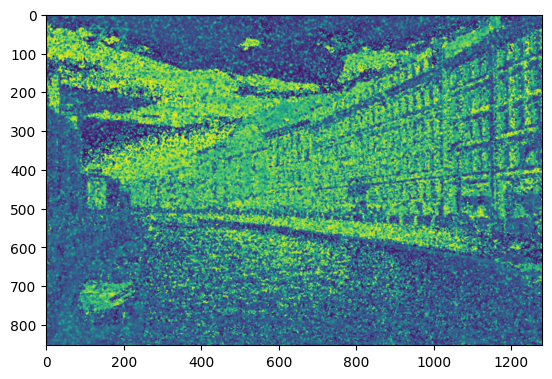

In [261]:
new_image = cv2.medianBlur(image_5, 5)
new_image = cv2.GaussianBlur(image_5, (11,11), 0) - new_image
new_image = cv2.GaussianBlur(new_image, (3,3), 0)
plt.imshow(new_image)